In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2021-06-04 04:56:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています... 128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84199 (82K) [application/x-httpd-php]
`winequality-red.csv' に保存中

winequality-red.csv 100%[===================>]  82.23K   295KB/s 時間 0.3s       

2021-06-04 04:56:21 (295 KB/s) - `winequality-red.csv' へ保存完了 [84199/84199]



# リッジ回帰について

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import io
import math

# データを読み込む
wine = pd.read_csv('winequality-red.csv', header=0,  sep=";")
featureName=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']
objectiveName=['quality']

# 学習データを作る
sc = StandardScaler()
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
X = sc.fit_transform(X)
y = wine['quality'].values

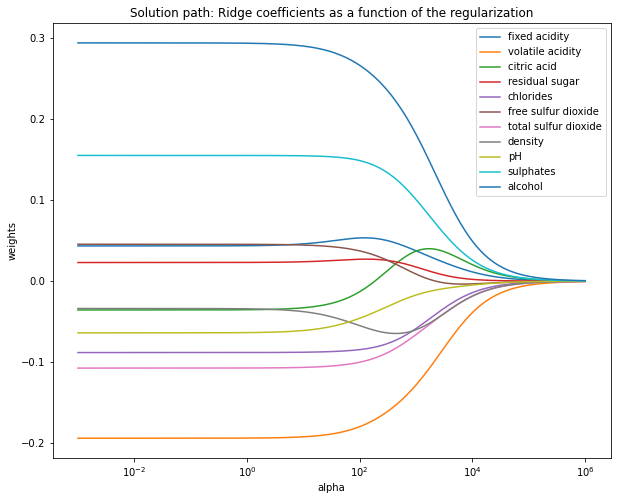

In [5]:
# scikit learn, "Plot Ridge coefficients as a function of the regularization"をもとに作成。
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

# Compute paths
n_alphas = 200
#2^(-3) ~ 2^6までのalphaを生成
alphas = np.logspace(-3, 6, n_alphas)

coefs = []
for alpha in alphas:
    #False に設定すると切片を求める計算を含めない。
    #目的変数が原点を必ず通る性質のデータを扱うときに利用。 (デフォルト値: True)
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results
fig = plt.figure(figsize=(10,8))
# Axes指定されたキーワード引数に一致する現在の Figureの現在のインスタンスを取得するか、作成します。
#gcaについてあんまりよくわかってない、調べる
ax = plt.gca()
lineObject=ax.plot(alphas, coefs)
plt.legend(iter(lineObject), featureName)

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Solution path: Ridge coefficients as a function of the regularization')

plt.show()


# ラッソ回帰について

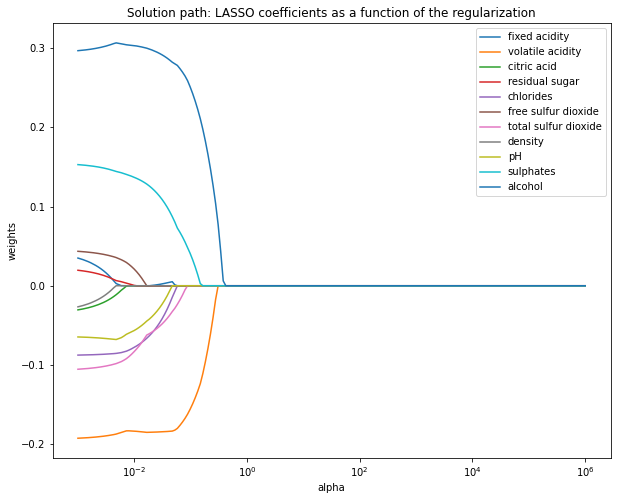

In [9]:
from sklearn.linear_model import Lasso


# Compute paths
n_alphas = 200
alphas = np.logspace(-3, 6, n_alphas)
coefs = []
for alpha in alphas:
    ridge = Lasso(alpha=alpha, fit_intercept=True)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results
fig = plt.figure(figsize=(10,8))
ax = plt.gca()
lineObject=ax.plot(alphas, coefs)
plt.legend(iter(lineObject), featureName)

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Solution path: LASSO coefficients as a function of the regularization')

plt.show()